In [3]:
import pickle

from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

1. Przygotowanie danych

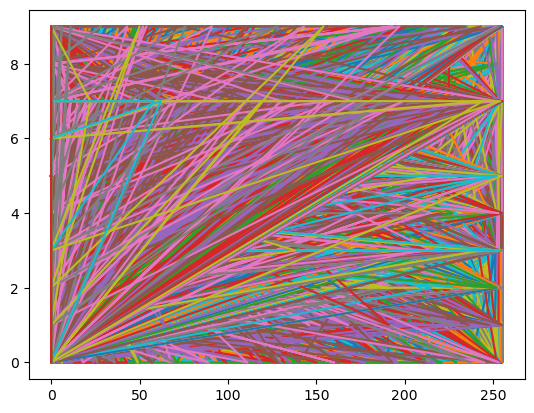

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.target = mnist.target.astype(np.uint8)
X = mnist['data']
y = mnist['target']

plt.plot(X, y)
plt.show()

2. KMeans

In [4]:
km8 = KMeans(8)
km9 = KMeans(9)
km10 = KMeans(10)
km11 = KMeans(11)
km12 = KMeans(12)

km8.fit(X)
km9.fit(X)
km10.fit(X)
km11.fit(X)
km12.fit(X)

y_km8 = km8.predict(X)
y_km9 = km9.predict(X)
y_km10 = km10.predict(X)
y_km11 = km11.predict(X)
y_km12 = km12.predict(X)

C:\Users\asiaw\anaconda3\envs\de\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asiaw\anaconda3\envs\de\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asiaw\anaconda3\envs\de\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asiaw\anaconda3\envs\de\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asiaw\anaconda3

In [5]:
silhouette = [silhouette_score(X, km8.labels_), silhouette_score(X, km9.labels_), silhouette_score(X, km10.labels_), silhouette_score(X, km11.labels_), silhouette_score(X, km12.labels_)]
print(silhouette)

with open('kmeans_sil.pck', 'wb') as f:
    pickle.dump(silhouette, f)

[0.07338772707069896, 0.056804870693629286, 0.05861041940720769, 0.058329302227056304, 0.058203481085121994]


In [10]:
print(silhouette[0].dtype)

float64


In [7]:
matrix = confusion_matrix(y, y_km10)

array = np.argmax(matrix, axis=1)
array = np.sort(array)
array = np.unique(array)

with open('kmeans_argmax.pck', 'wb') as f:
    pickle.dump(array, f)

[0 2 3 5 6 7 8 9]


3. DBSCAN

In [7]:
dists = []
for i in range(300):
    x1 = X[i]
    for j in range(len(X)):
        if i != j:
            x2 = X[j]
            dist = np.linalg.norm(x1 - x2)
            if dist != 0:
                dists.append(dist)

eps_values = sorted(dists)[:10]

print(eps_values)

with open('dist.pkl', 'wb') as f:
    pickle.dump(eps_values, f)

[279.26152617215286, 304.37641170103836, 317.5893575043093, 328.7658741414626, 333.4546445920344, 352.89800226127664, 355.1774204534967, 358.07401469528617, 359.64287842247063, 360.42474942767177]


In [13]:
eps_mean = np.mean(eps_values[:3])
array = np.array([], dtype=np.int32)
for eps in np.arange(eps_mean, eps_mean+eps_mean * 0.1, eps_mean * 0.04):
    dbscan = DBSCAN(eps)
    clusters = dbscan.fit_predict(X)
    clusters = len(set(clusters))
    array = np.append(array, clusters)

print(array)
with open('dbscan_len.pkl', 'wb') as f:
    pickle.dump(array, f)

[ 3  6 21]
[ 3  6 21]
